# Предобработка текста

Первый шаг любой аналитики – получение данных. Предположим, что данные есть в некотором подходящем для работы формате. Следующая задача – предобработка. Выделяют следующие этапы предобработки:

* Токенизация — самый первый шаг при обработке текста.
* Нормализация — приведение к одному регистру, удаление пунктуации, исправление опечаток и т.д.
** Стемминг — выделение псевдоосновы слова.
** Лемматизация — приведение слов к словарной ("начальной") форме.
* Удаление стоп-слов — слов, которые не несут никакой смысловой нагрузки (предлоги, союзы и т.п.) Список зависит от задачи!
* Part-of-Speech tagging (морфологическая разметка) — приписывание частеречного тега или цепочки грамматических тегов (полный грамматический разбор) токену.

NB! Не всегда нужны все этапы, все зависит от задачи. Некоторые этапы предобработки приводят к потере информации и могут усложнить дальнейшее построение модели.

Также в дополнение к этим шагам можно делать: приведение к нижнему регистру, фильтрацию по частоте/длине/соответствию регулярному выражению.

Продолжаем разбираться с предобработкой текста на примере новости с сайте Гринписа [отсюда](https://colab.research.google.com/drive/1fe4yLQsYgNmfjKdkJCB0K1nm4G8MKNzq?usp=sharing).

In [ ]:
text = """Greenpeace Франции совместно с другими НКО (Notre Affaire à Tous, Фонд Николя Юло и Oxfam France) требуют от властей возместить ущерб, 
причинённый гражданам страны из-за политики в области экологии и начать активные действия в рамках предыдущих соглашений. Соответствующий иск подали 
ещё два года назад из-за бездействия государства в решении проблемы климатического кризиса. Сегодня состоялось слушание дела в суде Парижа, решение 
по которому будет вынесено в течение двух недель.&nbsp; Хотя климатический кризис остаётся одной из главных проблем для французов (в 2020 году были 
побиты новые температурные рекорды), государство продолжает откладывать принятие необходимых мер. Выбросы парниковых газов в течение последних пяти лет 
продолжали снижаться вдвое медленнее, чем показатели, предусмотренные законом. В декабре прошлого года Высший совет по климату (независимый орган, созданный 
в 2018 году и состоящий из экспертов по климату) проанализировал, что две трети плана стимулирования не работают и, наоборот, могут способствовать увеличению 
выбросов.&nbsp; В Greenpeace Франции надеются, что суд признает обязанность государств бороться с климатическим кризисом — это подтверждает Хартия окружающей 
среды 2004 года  и Европейская конвенция о правах человека. <blockquote class="wp-block-quote">«Такое решение было бы историческим и закрепило в законе, что 
борьба с изменением климата играет важную роль в защите основ ных прав граждан».<cite>Greenpeace France</cite></blockquote> Кроме того, Greenpeace Франции 
ранее запустил петицию «Дело века», которую уже поддержало более двух миллионов граждан.&nbsp; «Климатический кризис оказывает серьёзное воздействие на жизнь 
каждого из нас: увеличение дней с экстремально высокой температурой приводит к повышению смертности людей по всему миру, растёт ареал распространения различных 
вирусов и инфекций. В России тоже остро стоит 
<a href="https://climatescience.ru/climate-2020-12-09.pdf?_ga=2.104332352.1990835110.1609256341-133469842.1597066306">необходимость скорейшего начала 
технологической трансформации экономики</a> в сторону климатически устойчивых технологий. Мы надеемся, что судебный процесс во Франции будет выигран людьми и 
станет примером в том числе и для нашего государства в вопросах важности срочного принятия мер по решению климатического кризиса», — прокомментировала руководительница 
энергетического отдела Greenpeace в России Елена Сакирко."""
text

'Greenpeace Франции совместно с другими НКО (Notre Affaire à Tous, Фонд Николя Юло и Oxfam France) требуют от властей возместить ущерб, \nпричинённый гражданам страны из-за политики в области экологии и начать активные действия в рамках предыдущих соглашений. Соответствующий иск подали \nещё два года назад из-за бездействия государства в решении проблемы климатического кризиса. Сегодня состоялось слушание дела в суде Парижа, решение \nпо которому будет вынесено в течение двух недель.&nbsp; Хотя климатический кризис остаётся одной из главных проблем для французов (в 2020 году были \nпобиты новые температурные рекорды), государство продолжает откладывать принятие необходимых мер. Выбросы парниковых газов в течение последних пяти лет \nпродолжали снижаться вдвое медленнее, чем показатели, предусмотренные законом. В декабре прошлого года Высший совет по климату (независимый орган, созданный \nв 2018 году и состоящий из экспертов по климату) проанализировал, что две трети плана стимулирован

## Удаление тегов html-разметки

In [ ]:
import re

In [ ]:
result = re.sub(r'<(.*?)>', "", text)
result

'Greenpeace Франции совместно с другими НКО (Notre Affaire à Tous, Фонд Николя Юло и Oxfam France) требуют от властей возместить ущерб, \nпричинённый гражданам страны из-за политики в области экологии и начать активные действия в рамках предыдущих соглашений. Соответствующий иск подали \nещё два года назад из-за бездействия государства в решении проблемы климатического кризиса. Сегодня состоялось слушание дела в суде Парижа, решение \nпо которому будет вынесено в течение двух недель.&nbsp; Хотя климатический кризис остаётся одной из главных проблем для французов (в 2020 году были \nпобиты новые температурные рекорды), государство продолжает откладывать принятие необходимых мер. Выбросы парниковых газов в течение последних пяти лет \nпродолжали снижаться вдвое медленнее, чем показатели, предусмотренные законом. В декабре прошлого года Высший совет по климату (независимый орган, созданный \nв 2018 году и состоящий из экспертов по климату) проанализировал, что две трети плана стимулирован

Очистим от символов перехода на новую строку.

In [ ]:
result = result.replace("\n", "")
result

'Greenpeace Франции совместно с другими НКО (Notre Affaire à Tous, Фонд Николя Юло и Oxfam France) требуют от властей возместить ущерб, причинённый гражданам страны из-за политики в области экологии и начать активные действия в рамках предыдущих соглашений. Соответствующий иск подали ещё два года назад из-за бездействия государства в решении проблемы климатического кризиса. Сегодня состоялось слушание дела в суде Парижа, решение по которому будет вынесено в течение двух недель.&nbsp; Хотя климатический кризис остаётся одной из главных проблем для французов (в 2020 году были побиты новые температурные рекорды), государство продолжает откладывать принятие необходимых мер. Выбросы парниковых газов в течение последних пяти лет продолжали снижаться вдвое медленнее, чем показатели, предусмотренные законом. В декабре прошлого года Высший совет по климату (независимый орган, созданный в 2018 году и состоящий из экспертов по климату) проанализировал, что две трети плана стимулирования не работа

Теперь стало заметнее, что помимо тегов html-разметки, в тексте встречается не очень понятная комбинация символов `&nbsp;`. Предположим, что она всегда начинается на `&` и заканчивается на `;`. Вероятно, между этими символами может стоять произвольная комбинация символов, хотя по текущему примеру это не очевидно.

In [ ]:
result = re.sub(r'&(.*?);', "", result)
result

'Greenpeace Франции совместно с другими НКО (Notre Affaire à Tous, Фонд Николя Юло и Oxfam France) требуют от властей возместить ущерб, причинённый гражданам страны из-за политики в области экологии и начать активные действия в рамках предыдущих соглашений. Соответствующий иск подали ещё два года назад из-за бездействия государства в решении проблемы климатического кризиса. Сегодня состоялось слушание дела в суде Парижа, решение по которому будет вынесено в течение двух недель. Хотя климатический кризис остаётся одной из главных проблем для французов (в 2020 году были побиты новые температурные рекорды), государство продолжает откладывать принятие необходимых мер. Выбросы парниковых газов в течение последних пяти лет продолжали снижаться вдвое медленнее, чем показатели, предусмотренные законом. В декабре прошлого года Высший совет по климату (независимый орган, созданный в 2018 году и состоящий из экспертов по климату) проанализировал, что две трети плана стимулирования не работают и, 

Теперь визуально текст стал чище. Можно перейти к токенизации.

Токенизировать - значит, поделить текст на части: слова, ключевые слова, фразы, символы и т.д., иными словами **токены**.

Можно разделить текст на токены методом `split()`, можно пострадать с регулярными выражениями, например, считая, что токенами могут быть только слова, и предварительно решив задачу разделения текста на слова в семантическом понимании этого слова. Проще всего обратиться сразу к уже существующему токенизатору.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens_split = result.split()
print(tokens_split)
print(len(tokens_split))

['Greenpeace', 'Франции', 'совместно', 'с', 'другими', 'НКО', '(Notre', 'Affaire', 'à', 'Tous,', 'Фонд', 'Николя', 'Юло', 'и', 'Oxfam', 'France)', 'требуют', 'от', 'властей', 'возместить', 'ущерб,', 'причинённый', 'гражданам', 'страны', 'из-за', 'политики', 'в', 'области', 'экологии', 'и', 'начать', 'активные', 'действия', 'в', 'рамках', 'предыдущих', 'соглашений.', 'Соответствующий', 'иск', 'подали', 'ещё', 'два', 'года', 'назад', 'из-за', 'бездействия', 'государства', 'в', 'решении', 'проблемы', 'климатического', 'кризиса.', 'Сегодня', 'состоялось', 'слушание', 'дела', 'в', 'суде', 'Парижа,', 'решение', 'по', 'которому', 'будет', 'вынесено', 'в', 'течение', 'двух', 'недель.', 'Хотя', 'климатический', 'кризис', 'остаётся', 'одной', 'из', 'главных', 'проблем', 'для', 'французов', '(в', '2020', 'году', 'были', 'побиты', 'новые', 'температурные', 'рекорды),', 'государство', 'продолжает', 'откладывать', 'принятие', 'необходимых', 'мер.', 'Выбросы', 'парниковых', 'газов', 'в', 'течение', '

In [ ]:
tokens = word_tokenize(result)
print(tokens)
len(tokens)

['Greenpeace', 'Франции', 'совместно', 'с', 'другими', 'НКО', '(', 'Notre', 'Affaire', 'à', 'Tous', ',', 'Фонд', 'Николя', 'Юло', 'и', 'Oxfam', 'France', ')', 'требуют', 'от', 'властей', 'возместить', 'ущерб', ',', 'причинённый', 'гражданам', 'страны', 'из-за', 'политики', 'в', 'области', 'экологии', 'и', 'начать', 'активные', 'действия', 'в', 'рамках', 'предыдущих', 'соглашений', '.', 'Соответствующий', 'иск', 'подали', 'ещё', 'два', 'года', 'назад', 'из-за', 'бездействия', 'государства', 'в', 'решении', 'проблемы', 'климатического', 'кризиса', '.', 'Сегодня', 'состоялось', 'слушание', 'дела', 'в', 'суде', 'Парижа', ',', 'решение', 'по', 'которому', 'будет', 'вынесено', 'в', 'течение', 'двух', 'недель', '.', 'Хотя', 'климатический', 'кризис', 'остаётся', 'одной', 'из', 'главных', 'проблем', 'для', 'французов', '(', 'в', '2020', 'году', 'были', 'побиты', 'новые', 'температурные', 'рекорды', ')', ',', 'государство', 'продолжает', 'откладывать', 'принятие', 'необходимых', 'мер', '.', 'Вы

338

## Очистка текста

Очистим текст от пунктуации и приведем все слова к нижнему регистру.

In [ ]:
import string

In [ ]:
punct = string.punctuation + "—" + "«" + "»"
tokens = [token.lower() for token in tokens if token not in punct]
print(len(tokens))
print(string.punctuation)
tokens

295
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['greenpeace',
 'франции',
 'совместно',
 'с',
 'другими',
 'нко',
 'notre',
 'affaire',
 'à',
 'tous',
 'фонд',
 'николя',
 'юло',
 'и',
 'oxfam',
 'france',
 'требуют',
 'от',
 'властей',
 'возместить',
 'ущерб',
 'причинённый',
 'гражданам',
 'страны',
 'из-за',
 'политики',
 'в',
 'области',
 'экологии',
 'и',
 'начать',
 'активные',
 'действия',
 'в',
 'рамках',
 'предыдущих',
 'соглашений',
 'соответствующий',
 'иск',
 'подали',
 'ещё',
 'два',
 'года',
 'назад',
 'из-за',
 'бездействия',
 'государства',
 'в',
 'решении',
 'проблемы',
 'климатического',
 'кризиса',
 'сегодня',
 'состоялось',
 'слушание',
 'дела',
 'в',
 'суде',
 'парижа',
 'решение',
 'по',
 'которому',
 'будет',
 'вынесено',
 'в',
 'течение',
 'двух',
 'недель',
 'хотя',
 'климатический',
 'кризис',
 'остаётся',
 'одной',
 'из',
 'главных',
 'проблем',
 'для',
 'французов',
 'в',
 '2020',
 'году',
 'были',
 'побиты',
 'новые',
 'температурные',
 'рекорды',
 'государство',
 'продолжает',
 'откладывать',
 'приняти

Удалим из текста стоп-слова.

In [ ]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words("russian")

In [ ]:
wout_sw = [word for word in tokens if word not in stopwords_list]
print(wout_sw)
len(wout_sw)

['greenpeace', 'франции', 'совместно', 'другими', 'нко', 'notre', 'affaire', 'à', 'tous', 'фонд', 'николя', 'юло', 'oxfam', 'france', 'требуют', 'властей', 'возместить', 'ущерб', 'причинённый', 'гражданам', 'страны', 'из-за', 'политики', 'области', 'экологии', 'начать', 'активные', 'действия', 'рамках', 'предыдущих', 'соглашений', 'соответствующий', 'иск', 'подали', 'ещё', 'года', 'назад', 'из-за', 'бездействия', 'государства', 'решении', 'проблемы', 'климатического', 'кризиса', 'сегодня', 'состоялось', 'слушание', 'дела', 'суде', 'парижа', 'решение', 'которому', 'вынесено', 'течение', 'двух', 'недель', 'хотя', 'климатический', 'кризис', 'остаётся', 'одной', 'главных', 'проблем', 'французов', '2020', 'году', 'побиты', 'новые', 'температурные', 'рекорды', 'государство', 'продолжает', 'откладывать', 'принятие', 'необходимых', 'мер', 'выбросы', 'парниковых', 'газов', 'течение', 'последних', 'пяти', 'лет', 'продолжали', 'снижаться', 'вдвое', 'медленнее', 'показатели', 'предусмотренные', 'з

231

Видим, что часть слов выбивается из общей массы. Например, предлоги и не несущие особого смысла наречия. Пока что не будем расширять список стоп-слов. Это будет логичнее сделать после лемматизации, когда разные словоформы сольются в одно слово.

## Исправление опечаток

Как правило, спеллчекеры (программы для исправления ошибок/опечаток) основаны на расстоянии Левенштейна (редакционное расстояние, edit distance). Это минимальное количество операций вставки одного символа, удаления одного символа и замены одного символа на другой, необходимых для превращения одной строки в другую.

Пусть имеется две строки $S_1$ и $S_2$. Мы хотим перевести одну в другую (пусть первую во вторую, по сути, операции симметричны). У нас есть следующие операции, каждая из которых имеет свою цену:
*   M: Символы в соответствующих позициях совпадают (цена = 0)
*   I: Вставка символа в произвольное место (цена = 1)
*   D: Удаление символа с произвольной позиции (цена = 1)
*   R: Замена символа на другой (цена = 1)

Тогда $d(S_1,S_2)$ — минимальное количество операций M/I/D/R для перевода $S_1$ в $S_2$, а редакционное предписание — перечисление операций для перевода с их параметрами.

Логично, что если в слове допущена одна опечатка, редакционное расстояние будет равно 1, а если строки совпадают, то 0.

Расстояние Левенштейна рассчитывается по формуле Вагнера-Фишера. Для этого вводится вспомогательная функция $D(M,N)$, находящую редакционное расстояние для подстрок $S_1[0..M]$ и $S_2[0..N]$, а полное редакционное расстояние равно расстоянию для подстрок полной длины: $d(S_1,S_2) = D_{S_1,S_2}(M,N)$.

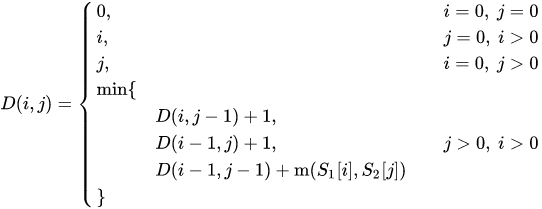

Символы в строках нумеруются не от 0, а от 1.

Из формулы видно, что:
1. если обе строки имеют длину 0, то и редакционное расстояние равно 0
2. если одна строка пустая, а вторая нет, то редакционное расстояние равно длине непустой строки
3. если обе строки непустые, то мы комбинируем операции замены, удаления и вставки таким образом, чтобы их общая цена была минимальной
4. формула рекурсивная



В оптимальной последовательности операций их можно произвольно менять местами, т.к.:

*   две замены одного и того же символа — неоптимально (если мы заменили $x$ на $y$, потом — $y$ на $z$, выгоднее было сразу заменить $x$ на $z$)
*   две замены разных символов можно менять местами
*   два стирания или две вставки можно менять местами
*   вставка символа с его последующим стиранием — неоптимально (можно их обе отменить)
*   стирание и вставку разных символов можно менять местами
*   вставка символа с его последующей заменой — неоптимально (излишняя замена)
*   вставка символа и замена другого символа меняются местами
*   замена символа с его последующим стиранием — неоптимально (излишняя замена)
*   стирание символа и замена другого символа меняются местами

В общем и целом, здесь действует правило треугольника: *если две последовательные операции можно заменить одной, это не ухудшает общую цену*.

Модификация расстояния Левенштейна — расстояние Дамерау-Левенштейна — включает также операцию перестановки (транспозиции) символов.

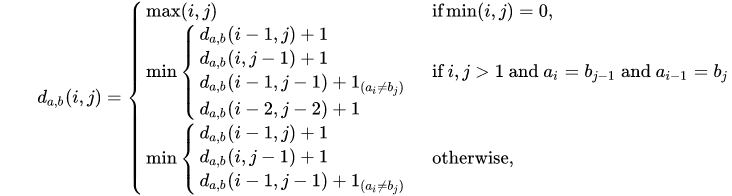

Поглубже в теорию можно почитать [тут](https://web.stanford.edu/class/cs124/lec/med.pdf). Вполне рабочую реализацию алгоритма Дамерау-Левенштейна на Python можно найти даже в [Википедии](https://ru.wikipedia.org/wiki/Расстояние_Дамерау_—_Левенштейна). Более оптимальные и обстоятельные варианты можно поискать в уже готовых решениях, например:
1. [python-Levenshtein](https://github.com/ztane/python-Levenshtein) считает расстояние Левенштейна и производит операции редактирования строк.
2. [jellyfish](https://github.com/jamesturk/jellyfish) позволяет находить расстояние Левенштейна, Дамерау-Левенштейна, расстояние Хэмминга и несколько других интересных характеристик пар слов.
3. [nltk.metrics](http://www.nltk.org/howto/metrics.html) может рассчитать расстояние Левенштейна и Дамерау-Левенштейна.

Посмотрим эти модули в деле. 

### nltk.metrics

За расчет расстояния Левенштейна и Дамерау-Левенштейна в nltk.metrics отвечает функция `edit_distance()`.

In [ ]:
import nltk
from nltk.metrics import edit_distance

In [ ]:
edit_distance("климат", "климатический")

7

Чтобы учитывать перестановки, т.е. находить расстояние Дамерау-Левенштейна, у функции `edit_distance()` есть именованный аргумент `transpositions`, по умолчанию равный `False`.

In [ ]:
edit_distance("климат", "климатический", transpositions=True)

7

В этом примере это ничего не изменило. Посмотрим более интересный случай.

In [ ]:
print(f"Левенштейн/Левентшейн: {edit_distance('Левенштейн', 'Левентшейн')}")
print(f"Левенштейн/Левентшейн (по Дамерау-Левенштейну): {edit_distance('Левенштейн', 'Левентшейн', transpositions=True)}")

Левенштейн/Левентшейн: 2
Левенштейн/Левентшейн (по Дамерау-Левенштейну): 1


Также можно переназначить цену операции (по умолчанию равна 1) через именованный аргумент `substitution_cost`.

Чтобы понять, какие действия производились для вычисления расстояния Левенштейна, полезно использовать функцию `edit_distance_align()`, которая показывает, в каком месте производится какая операция. Можно обратиться к [документации](https://www.nltk.org/api/nltk.metrics.html) для знакомства с этой функцией и другими мерами похожести строк.

### jellyfish

Теперь посмотрим, что умеет модуль `jellyfish`. Посчитаем снова редакционное расстояние и расстояние Дамерау-Левенштейна. [Ссылочка](https://jellyfish.readthedocs.io/en/latest/comparison.html) на документацию.

In [ ]:
!pip install jellyfish

     |████████████████████████████████| 92kB 4.3MB/s 


In [ ]:
import jellyfish

In [ ]:
print(f"Левенштейн/Левентшейн: {jellyfish.levenshtein_distance('Левенштейн', 'Левентшейн')}")
print(f"Левенштейн/Левентшейн (по Дамерау-Левенштейну): {jellyfish.damerau_levenshtein_distance('Левенштейн', 'Левентшейн')}")
jellyfish.match_rating_comparison('Левенштейн', 'Левентшейн') #говорит, можно ли считать строки фонетически эквивалентными

Левенштейн/Левентшейн: 2
Левенштейн/Левентшейн (по Дамерау-Левенштейну): 1


True

С оценкой эквивалентности есть проблема: короткие (заведомо разные) слова будут считаться эквивалентными, если различаются всего одной буквой.

In [ ]:
jellyfish.match_rating_comparison("camp", "damp")

True

Или даже больше, чем одной.

In [ ]:
jellyfish.match_rating_comparison("camp", "dump")

True

Почему так получается: строки сравниваются по последовательности, которой их кодирует алгоритм match rating approach (MRA), заложенный в реализации функции. 

In [ ]:
print("camp ->", jellyfish.match_rating_codex("camp"))
print("damp ->", jellyfish.match_rating_codex("damp"))
print("dump ->", jellyfish.match_rating_codex("dump"))

camp -> CMP
damp -> DMP
dump -> DMP


In [ ]:
print(jellyfish.jaro_winkler_similarity('Левенштейн', 'Левентшейн'))
print(jellyfish.jaro_winkler_similarity("camp", "dump"))

0.98
0.6666666666666666


### python-Levenshtein

И посмотрим третий модуль - python-Levenshtein. [Ссылочка](https://rawgit.com/ztane/python-Levenshtein/master/docs/Levenshtein.html) на документацию.

In [ ]:
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149792 sha256=b80bc54ee98f27629069fb1c2633eed7db3f0d3e95134a80004ec081e44aa3de
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-Levenshtein


In [ ]:
import Levenshtein as levenshtein

Можно посчитать само расстояние Левенштейна. Дамерау-Левенштейна нельзя.

In [ ]:
levenshtein.distance('Левенштейн', 'Левентшейн')

2

Можно посмотреть, какие операции и в какой последовательности производятся над редактируемой строкой.

In [ ]:
levenshtein.editops('Левенштейн', 'Левентшейн')

[('replace', 5, 5), ('replace', 6, 6)]

Видим, что надо поменять местами 5 и 6 буквы, т.е. "ш" и "т".

Можно посчитать похожесть двух строк в диапазоне от 0 до 1.

In [ ]:
levenshtein.ratio('Левенштейн', 'Левентшейн')

0.9

In [ ]:
levenshtein.jaro_winkler('Левенштейн', 'Левентшейн')

0.9833333333333334

Функции `setratio` и `seqratio` посчитают похожесть для набора строк.

С помощью функции `apply_edit()` можно отредактировать строку.

In [ ]:
params = levenshtein.editops('Левентшейн', 'Левенштейн')
levenshtein.apply_edit(params, 'Левентшейн', 'Левенштейн')

'Левенштейн'

Обратите внимание, что сначала указывается исходная строка, а потом та, в которую ее нужно преобразовать.

### Yandex Spellchecker API



```
# This is formatted as code
```

Помимо модулей, можно использовать сторонние программы. Например, [Yandex Spellchecker API](https://yandex.ru/dev/speller/doc/dg/concepts/api-overview.html).

In [ ]:
import requests

Напишем очень простую функцию для проверки орфографии с помощью API Яндекса. На вход функция будет принимать одно слово или текст. Под текстом понимаем комбинации непробельных символов, разделенных одним или несколькими пробельными символами. Возвращает функция само слово и варианты исправлений для него. В случае, если на вход поступил текст - возвращается список слов текста с вариантами исправлений.

In [ ]:
def check_spelling(text):
  domain = "https://speller.yandex.net/services/spellservice.json"
  words = text.split()
  if len(words) == 1:
    request = requests.get(domain + "/checkText?text=" + words[0])
    if requests:
      return request.json()[0]["word"], request.json()[0]["s"]
    else:
      return None
  elif len(words) > 1:
    words = "+".join(words)
    request = requests.get(domain + "/checkText?text=" + words)
    if requests:
      response = [(i["word"], i["s"]) for i in request.json()]
      return response
    else:
      return None
  return None
  

In [ ]:
check_spelling("Левентшейн алгаритм")

[('Левентшейн', ['Левенштейн', 'Левентшейн', 'Левенштейна']),
 ('алгаритм', ['алгоритм'])]

## Морфологический анализ с pymorphy2

**Морфологический анализ** — это получение леммы или основы (псевдоосновы) заданного токена, а при необходимости, морфологических параметров.

In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 61kB 3.6MB/s 
     |████████████████████████████████| 8.2MB 7.8MB/s 


Морфологический анализ в pymorphy2 производится классом MorphAnalyzer. Русский язык в нем используется по умолчанию.

In [ ]:
import pymorphy2
analyzer = pymorphy2.MorphAnalyzer()

Чтобы разобрать отдельное слово, можно воспользоваться методом `parse()`.

In [ ]:
climat = analyzer.parse("климат")
climat

[Parse(word='климат', tag=OpencorporaTag('NOUN,inan,masc sing,nomn'), normal_form='климат', score=0.733333, methods_stack=((DictionaryAnalyzer(), 'климат', 34, 0),)),
 Parse(word='климат', tag=OpencorporaTag('NOUN,inan,masc sing,accs'), normal_form='климат', score=0.266666, methods_stack=((DictionaryAnalyzer(), 'климат', 34, 3),))]

Чтобы понять, что нам вывелось в поле `tag`, нужно понимать граммемы. Все, что использует pymorphy2, можно найти в [документации](https://pymorphy2.readthedocs.io/en/latest/user/grammemes.html#grammeme-docs).

В текущем примере вывод можно прочитать следующим образом: с вероятностью 0.73 "климат" - это неодушевленное (`inan`) существительное (`NOUN`) мужского рода (`masc`), единственного числа (`sing`) в именительном падеже (`nomn`) или в винительном (`accs`) с вероятностью 0.26.

Каждую из характеристик можно извлечь отдельно.

In [ ]:
climat = analyzer.parse("климат")[0]

In [ ]:
print(climat.tag.POS) # часть речи
print(climat.tag.animacy) # одушевленность
print(climat.tag.gender) # род
print(climat.tag.number) # число
print(climat.tag.case) # падеж

NOUN
inan
masc
sing
nomn


Также есть ряд других свойств:
* `aspect` - совершенный/несовершенный вид
* `involvement` - включенность говорящего в действие
* `mood` - наклонение
* `person` - лицо
* `tense` - время
* `transitivity` - переходность
* `voice` - залог

pymorphy2 умеет преобразовывать слова в нормальную форму (например, единственное число, именительный падеж у существительных или инфинитив у глаголов).

In [ ]:
climat.normal_form

'климат'

Возьмем случай поинтереснее.

In [ ]:
climatic = analyzer.parse("климатического")[0]
climatic.tag

OpencorporaTag('ADJF masc,sing,gent')

Полное прилагательное (`ADJF`) мужского рода (`masc`) единственного числа (`sing`) в родительном падеже (`gent`).

In [ ]:
climatic.normal_form

'климатический'

Или можно взять полный разбор нормальной формы.

In [ ]:
climatic.normalized

Parse(word='климатический', tag=OpencorporaTag('ADJF masc,sing,nomn'), normal_form='климатический', score=1.0, methods_stack=((DictionaryAnalyzer(), 'климатический', 16, 0),))

pymorphy2 работает не только с существующими словами. Он может предсказывать наиболее вероятные морфологические характеристики несуществующих слов.

In [ ]:
analyzer.parse('бутявковедами')

[Parse(word='бутявковедами', tag=OpencorporaTag('NOUN,anim,masc plur,ablt'), normal_form='бутявковед', score=0.9821428571428571, methods_stack=((FakeDictionary(), 'бутявковедами', 52, 10), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'едами'))),
 Parse(word='бутявковёдами', tag=OpencorporaTag('NOUN,anim,masc,Name plur,ablt'), normal_form='бутявковёд', score=0.008928571428571428, methods_stack=((FakeDictionary(), 'бутявковёдами', 27, 10), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'ёдами'))),
 Parse(word='бутявковёдами', tag=OpencorporaTag('NOUN,inan,masc plur,ablt'), normal_form='бутявковёд', score=0.008928571428571428, methods_stack=((FakeDictionary(), 'бутявковёдами', 34, 10), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'ёдами')))]

Наиболее вероятный результат сообщает, что перед нами одушевленное существительное мужского рода множественного числа в творительном падеже. Звучит действительно логично.

Бывают и не такие удачные попадания.

In [ ]:
analyzer.parse("кивинка")

[Parse(word='кивинка', tag=OpencorporaTag('NOUN,anim,masc sing,gent'), normal_form='кивинк', score=0.33999999999999997, methods_stack=((DictionaryAnalyzer(), 'инка', 2, 1), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'кив'))),
 Parse(word='кивинка', tag=OpencorporaTag('NOUN,anim,masc sing,accs'), normal_form='кивинк', score=0.33999999999999997, methods_stack=((DictionaryAnalyzer(), 'инка', 2, 3), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'кив'))),
 Parse(word='кивинка', tag=OpencorporaTag('NOUN,inan,femn sing,nomn'), normal_form='кивинка', score=0.31999999999999995, methods_stack=((FakeDictionary(), 'кивинка', 8, 0), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'винка')))]

Проверять, есть ли граммема в списке тегов, можно с помощью оператора `in`.

In [ ]:
"ADJF" in climatic.tag

True

Если не хочется разбираться в английских сокращениях названий граммем, можно включить кириллицу.

In [ ]:
climatic.tag.cyr_repr

'ПРИЛ мр,ед,рд'

С помощью pymorphy2 можно просклонять слово. Делать это можно с объектом, полученным в результате работы метода `parse()`.

In [ ]:
train = analyzer.parse("паровозик")[0]
train

Parse(word='паровозик', tag=OpencorporaTag('NOUN,inan,masc sing,nomn'), normal_form='паровозик', score=0.5, methods_stack=((DictionaryAnalyzer(), 'паровозик', 19, 0),))

In [ ]:
train.inflect({'loct'}) # предложный падеж

Parse(word='паровозике', tag=OpencorporaTag('NOUN,inan,masc sing,loct'), normal_form='паровозик', score=1.0, methods_stack=((DictionaryAnalyzer(), 'паровозике', 19, 5),))

In [ ]:
train.inflect({'ablt'}) # творительный падеж

Parse(word='паровозиком', tag=OpencorporaTag('NOUN,inan,masc sing,ablt'), normal_form='паровозик', score=1.0, methods_stack=((DictionaryAnalyzer(), 'паровозиком', 19, 4),))

Можно больше одного свойства.

In [ ]:
train.inflect({'ablt', 'plur'}) # творительный падеж, множественное число

Parse(word='паровозиками', tag=OpencorporaTag('NOUN,inan,masc plur,ablt'), normal_form='паровозик', score=1.0, methods_stack=((DictionaryAnalyzer(), 'паровозиками', 19, 10),))

При помощи `inflect()` можно помогать pymorphy2 образовывать нужную начальную форму.

In [ ]:
running = analyzer.parse("бегущего")[0]
running.normal_form

'бежать'

In [ ]:
running.inflect({"sing", "nomn"}).word

'бегущий'

Можно получить лексему слова, т.е. все словоформы.

In [ ]:
train.lexeme

[Parse(word='паровозик', tag=OpencorporaTag('NOUN,inan,masc sing,nomn'), normal_form='паровозик', score=1.0, methods_stack=((DictionaryAnalyzer(), 'паровозик', 19, 0),)),
 Parse(word='паровозика', tag=OpencorporaTag('NOUN,inan,masc sing,gent'), normal_form='паровозик', score=1.0, methods_stack=((DictionaryAnalyzer(), 'паровозика', 19, 1),)),
 Parse(word='паровозику', tag=OpencorporaTag('NOUN,inan,masc sing,datv'), normal_form='паровозик', score=1.0, methods_stack=((DictionaryAnalyzer(), 'паровозику', 19, 2),)),
 Parse(word='паровозик', tag=OpencorporaTag('NOUN,inan,masc sing,accs'), normal_form='паровозик', score=1.0, methods_stack=((DictionaryAnalyzer(), 'паровозик', 19, 3),)),
 Parse(word='паровозиком', tag=OpencorporaTag('NOUN,inan,masc sing,ablt'), normal_form='паровозик', score=1.0, methods_stack=((DictionaryAnalyzer(), 'паровозиком', 19, 4),)),
 Parse(word='паровозике', tag=OpencorporaTag('NOUN,inan,masc sing,loct'), normal_form='паровозик', score=1.0, methods_stack=((DictionaryA

Можно организовать согласование с числительными.

In [ ]:
print(f"5 {train.make_agree_with_number(5).word}")

5 паровозиков


До этого мы посмотрели только "хорошие" примеры, в которых pymorphy2 правильно определял часть речи и прочие характеристики слов. Посмотрим менее однозначный пример.

In [ ]:
book = "Слово о полку Игореве".split()

In [ ]:
print(analyzer.parse(book[2])[0].normal_form, analyzer.parse(book[3])[0].normal_form)

полка игорев


Не совсем то, что хотелось бы видеть. В pymorphy2 разборы ранжируются по убыванию условной вероятности, рассчитанной на основе OpenCorpora. В большинстве случаев можно просто брать первый вариант, но полный и точный словарь - утопия, поэтому стоит вводить уточняющие, вспомогательные указатели для pymorphy2 либо смириться с приблизительным результатом. В части задач это вполне приемлемый вариант.

Закончим с примером про Гринпис. Приведем все слова к нормальной форме.

In [ ]:
normalized = [analyzer.parse(word)[0].normal_form for word in wout_sw]
normalized

['greenpeace',
 'франция',
 'совместно',
 'другой',
 'нко',
 'notre',
 'affaire',
 'à',
 'tous',
 'фонд',
 'николя',
 'юло',
 'oxfam',
 'france',
 'требовать',
 'власть',
 'возместить',
 'ущерб',
 'причинить',
 'гражданин',
 'страна',
 'из-за',
 'политика',
 'область',
 'экология',
 'начать',
 'активный',
 'действие',
 'рамка',
 'предыдущий',
 'соглашение',
 'соответствовать',
 'иск',
 'подать',
 'ещё',
 'год',
 'назад',
 'из-за',
 'бездействие',
 'государство',
 'решение',
 'проблема',
 'климатический',
 'кризис',
 'сегодня',
 'состояться',
 'слушание',
 'дело',
 'суд',
 'париж',
 'решение',
 'который',
 'вынести',
 'течение',
 'два',
 'неделя',
 'хотя',
 'климатический',
 'кризис',
 'оставаться',
 'один',
 'главный',
 'проблема',
 'француз',
 '2020',
 'год',
 'побить',
 'новый',
 'температурный',
 'рекорд',
 'государство',
 'продолжать',
 'откладывать',
 'принятие',
 'необходимый',
 'мера',
 'выброс',
 'парниковый',
 'газ',
 'течение',
 'последний',
 'пять',
 'год',
 'продолжать',
 '

Будем считать, что все нормально, или логичнее сказать, все приведено к нормальной форме один способом. Текст не является узкоспециализированным, не будем углубляться в разбор. Проранжируем список по частоте вхождения в текст, чтобы расширить список стоп-слов.

In [ ]:
word_count = [(word, normalized.count(word)) for word in set(normalized)]
word_count.sort(key=lambda pair:pair[1], reverse=True)
word_count

[('год', 6),
 ('кризис', 5),
 ('климатический', 5),
 ('решение', 4),
 ('greenpeace', 4),
 ('франция', 4),
 ('государство', 4),
 ('климат', 3),
 ('два', 3),
 ('гражданин', 3),
 ('человек', 3),
 ('мера', 2),
 ('суд', 2),
 ('продолжать', 2),
 ('из-за', 2),
 ('надеяться', 2),
 ('проблема', 2),
 ('который', 2),
 ('france', 2),
 ('увеличение', 2),
 ('право', 2),
 ('высокий', 2),
 ('принятие', 2),
 ('закон', 2),
 ('течение', 2),
 ('дело', 2),
 ('выброс', 2),
 ('россия', 2),
 ('экономика', 1),
 ('скорый', 1),
 ('отдел', 1),
 ('это', 1),
 ('распространение', 1),
 ('активный', 1),
 ('нко', 1),
 ('жизнь', 1),
 ('температура', 1),
 ('защита', 1),
 ('повышение', 1),
 ('хотя', 1),
 ('газ', 1),
 ('соглашение', 1),
 ('область', 1),
 ('процесс', 1),
 ('страна', 1),
 ('эксперт', 1),
 ('мир', 1),
 ('париж', 1),
 ('проанализировать', 1),
 ('необходимость', 1),
 ('сегодня', 1),
 ('оставаться', 1),
 ('различный', 1),
 ('парниковый', 1),
 ('политика', 1),
 ('2004', 1),
 ('состоять', 1),
 ('необходимый', 1),


Вверху списка оказываются две категории слов: стоп-слова и ключевые слова. Безболезненно удалять можно только слова, не несущие смысловой нагрузки для текста (или корпуса). В этом тексте, например, это будут слова "год", "из-за", "это", "который". По результату анализа одного текста составлять список стоп-слов некорректно и не совсем логично. Такую процедуру имеет смысл проводить на большем объеме данных.